<a href="https://colab.research.google.com/github/VladPlusIn/internship_task/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Data Preparation

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Load the datasets
gps_data = pd.read_csv('/content/drive/MyDrive/Data Analyst Internship Tech Test.zip (Unzipped Files)/gps_data.csv')
imu_data = pd.read_csv('/content/drive/MyDrive/Data Analyst Internship Tech Test.zip (Unzipped Files)/imu_data.csv')

# Display the first few rows of each dataset
gps_data.head(), imu_data.head()

In [3]:
# Convert timestamps to datetime for proper merging
gps_data['NZDT'] = pd.to_datetime(gps_data['NZDT'])
imu_data['NZDT'] = pd.to_datetime(imu_data['NZDT'])

# Merge data on Serial Number and Timestamp
merged_data = pd.merge(gps_data, imu_data, on=['Serial Number', 'NZDT'], how='inner')

# Display the merged data
merged_data.head()

<ipython-input-3-c46c1ba71a74>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  gps_data['NZDT'] = pd.to_datetime(gps_data['NZDT'])
<ipython-input-3-c46c1ba71a74>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  imu_data['NZDT'] = pd.to_datetime(imu_data['NZDT'])


,Serial Number,NZDT,Latitude,Longitude,GPS Heading,GPS Speed,Heading
0,004-0009-00481,2020-10-16 17:27:15,-37.553447,175.459181,11,0.938258,373.461806
1,004-0009-00481,2020-10-16 17:27:14,-37.553455,175.459178,3,1.627387,364.935411
2,004-0009-00481,2020-10-16 17:27:13,-37.553470,175.459177,359,1.680147,342.940320
3,004-0009-00481,2020-10-16 17:27:12,-37.553485,175.459177,6,0.614859,351.169082
4,004-0009-00481,2020-10-16 17:27:10,-37.553496,175.459176,3,1.594698,345.652691


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Latitude'].plot(kind='hist', bins=20, title='Latitude')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Longitude'].plot(kind='hist', bins=20, title='Longitude')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['GPS Heading'].plot(kind='hist', bins=20, title='GPS Heading')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='index', y='Latitude', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Latitude', y='Longitude', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Longitude', y='GPS Heading', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='GPS Heading', y='GPS Speed', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['NZDT']
  ys = series['Latitude']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('NZDT', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('NZDT')
_ = plt.ylabel('Latitude')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['NZDT']
  ys = series['Longitude']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('NZDT', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('NZDT')
_ = plt.ylabel('Longitude')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['NZDT']
  ys = series['GPS Heading']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('NZDT', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('NZDT')
_ = plt.ylabel('GPS Heading')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['NZDT']
  ys = series['GPS Speed']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('NZDT', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('NZDT')
_ = plt.ylabel('GPS Speed')

from matplotlib import pyplot as plt
_df_12['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['Latitude'].plot(kind='line', figsize=(8, 4), title='Latitude')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['Longitude'].plot(kind='line', figsize=(8, 4), title='Longitude')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['GPS Heading'].plot(kind='line', figsize=(8, 4), title='GPS Heading')
plt.gca().spines[['top', 'right']].set_visible(False)

## 2. Data Visualization and Analysis


In [5]:
# Calculate the difference between IMU heading and GPS heading
merged_data['Heading Difference'] = merged_data['Heading'] - merged_data['GPS Heading']

# Normalize the heading difference to be within the range [-180, 180]
merged_data['Heading Difference'] = ((merged_data['Heading Difference'] + 180) % 360) - 180

# Summary statistics
heading_summary = merged_data['Heading Difference'].describe()
heading_summary

count    3309.000000
mean        0.630861
std        20.811906
min      -107.293878
25%       -15.749365
50%        -1.301963
75%        17.524708
max       138.019127
Name: Heading Difference, dtype: float64

- Mean: The mean heading difference close to zero indicates that, on average, the GPS and IMU headings are aligned.
- Standard Deviation: The standard deviation of about 20.81 degrees indicates considerable variability in the heading differences, suggesting potential sensor noise or actual head movements.
- 25th Percentile: -15.75 degrees, meaning 25% of the heading differences are less than this value.
- 50th Percentile (Median): -1.30 degrees, meaning half of the heading differences are less than this value.
- 75th Percentile: 17.52 degrees, meaning 75% of the heading differences are less than this value.

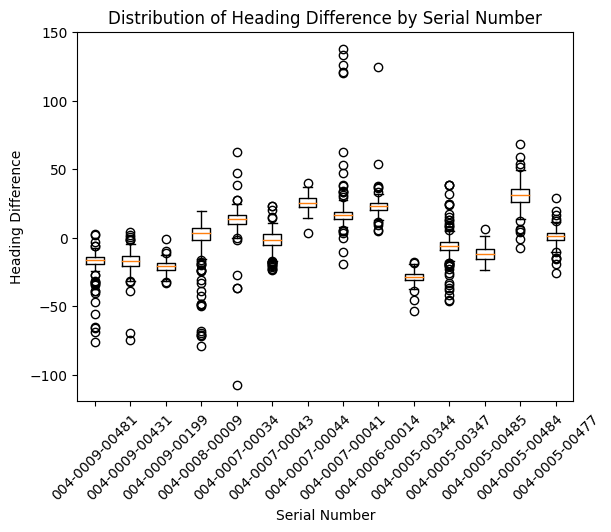

In [7]:
# Distribution of Heading Difference by Serial Number

import matplotlib.pyplot as plt

plt.boxplot([merged_data['Heading Difference'][merged_data['Serial Number'] == sn] for sn in merged_data['Serial Number'].unique()], labels=merged_data['Serial Number'].unique())

plt.xlabel('Serial Number')
plt.ylabel('Heading Difference')
plt.title('Distribution of Heading Difference by Serial Number')
_ = plt.xticks(rotation=45)

- Consistent Medians: For most cows, the median heading difference is close to zero, suggesting that, on average, the IMU and GPS headings are aligned.
- Variability: The spread (height of the box) varies among cows, indicating differences in variability. Some cows show a wider range of heading differences, suggesting more variability in the alignment between the IMU and GPS headings.
- Outliers: There are several outliers (points outside the whiskers) for most cows, indicating occasional large discrepancies between the IMU and GPS headings. These outliers could be due to sudden head movements or sensor inaccuracies.
- Cows with Larger Variability: Some cows (e.g., 004-0007-00041, 004-0005-00344) exhibit larger variability and more outliers, indicating greater discrepancies in the heading data.
- Potential Causes for Variability: The variability and outliers could be due to several factors such as the cow’s behavior (e.g., frequent head turns), sensor calibration issues, or environmental interferences affecting sensor readings.

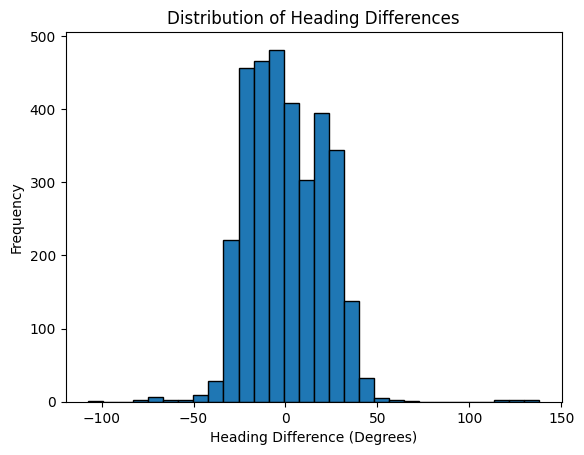

In [8]:
import matplotlib.pyplot as plt

# Plot the distribution of heading differences
plt.hist(merged_data['Heading Difference'], bins=30, edgecolor='black')
plt.xlabel('Heading Difference (Degrees)')
plt.ylabel('Frequency')
plt.title('Distribution of Heading Differences')
plt.show()

Peak Frequency: The highest frequency occurs around 0 degrees, indicating that most heading differences are close to zero. This suggests a good overall alignment between the GPS and IMU headings.

In [17]:
# Calculate the 3 quantiles (25th, 50th, and 75th percentiles)
quantiles = merged_data['Heading Difference'].quantile([0.25, 0.5, 0.75])

# Calculate the interquartile range (IQR)
IQR = quantiles[0.75] - quantiles[0.25]

# Define the threshold as 1.5 times the IQR above the 75th percentile and below the 25th percentile
lower_threshold = quantiles[0.25] - 1.5 * IQR
upper_threshold = quantiles[0.75] + 1.5 * IQR

# Identify anomalies based on the calculated thresholds
anomalies = merged_data[(merged_data['Heading Difference'] < lower_threshold) |
                        (merged_data['Heading Difference'] > upper_threshold)]

lower_threshold, upper_threshold, anomalies

(-65.66047555000017,
 67.43581845000023,
        Serial Number                NZDT   Latitude   Longitude  GPS Heading  \
 95    004-0009-00481 2020-10-16 17:25:16 -37.554699  175.459136          345   
 96    004-0009-00481 2020-10-16 17:25:14 -37.554699  175.459136          345   
 97    004-0009-00481 2020-10-16 17:25:13 -37.554699  175.459135          345   
 241   004-0009-00431 2020-10-16 16:47:57 -37.553478  175.459150           17   
 244   004-0009-00431 2020-10-16 16:47:54 -37.553483  175.459148          323   
 787   004-0008-00009 2020-10-16 16:03:47 -37.554688  175.459136          351   
 788   004-0008-00009 2020-10-16 16:03:46 -37.554689  175.459136          347   
 933   004-0008-00009 2020-10-16 16:00:46 -37.556512  175.459086          303   
 934   004-0008-00009 2020-10-16 16:00:45 -37.556511  175.459086          303   
 935   004-0008-00009 2020-10-16 16:00:44 -37.556512  175.459086          303   
 936   004-0008-00009 2020-10-16 16:00:43 -37.556513  175.459086    

In [ ]:
# Define a function to calculate the end point of the vector
def calculate_endpoint(lat, lon, heading, distance=0.0001):
    """
    Calculate the endpoint of the vector given a starting point, heading, and distance.
    """
    R = 6371e3  # Earth's radius in meters
    lat1 = np.radians(lat)
    lon1 = np.radians(lon)
    heading = np.radians(heading)

    lat2 = np.arcsin(np.sin(lat1) * np.cos(distance / R) + np.cos(lat1) * np.sin(distance / R) * np.cos(heading))
    lon2 = lon1 + np.arctan2(np.sin(heading) * np.sin(distance / R) * np.cos(lat1), np.cos(distance / R) - np.sin(lat1) * np.sin(lat2))

    return np.degrees(lat2), np.degrees(lon2)

# Calculate the endpoints for each row in the merged data
merged_data['End Latitude'], merged_data['End Longitude'] = zip(*merged_data.apply(
    lambda row: calculate_endpoint(row['Latitude'], row['Longitude'], row['Heading']), axis=1))

# Create a figure
fig = go.Figure()

# Add arrows for each cow's heading
for serial_number, group in merged_data.groupby('Serial Number'):
    fig.add_trace(go.Scattermapbox(
        mode='markers+lines',
        lon=np.concatenate([group['Longitude'].values, group['End Longitude'].values]),
        lat=np.concatenate([group['Latitude'].values, group['End Latitude'].values]),
        marker={'size': 10},
        line=dict(width=2),
        name=serial_number,
        text=group['NZDT'].astype(str)  # Adding timestamp as hover text
    ))

# Update layout for the map
fig.update_layout(
    title='Movement Tracks of Each Cow with Heading Vectors',
    mapbox=dict(
        style='open-street-map',
        zoom=15,
        center=dict(lat=merged_data['Latitude'].mean(), lon=merged_data['Longitude'].mean())
    ),
    showlegend=True
)

# Show the figure
fig.show()

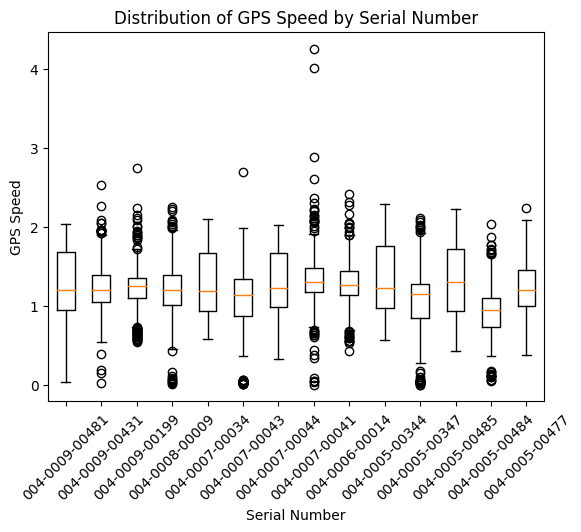

In [4]:
# @title Distribution of GPS Speed by Serial Number

import matplotlib.pyplot as plt

plt.boxplot([merged_data['GPS Speed'][merged_data['Serial Number'] == sn] for sn in merged_data['Serial Number'].unique()], labels=merged_data['Serial Number'].unique())

plt.xlabel('Serial Number')
plt.ylabel('GPS Speed')
plt.title('Distribution of GPS Speed by Serial Number')
_ = plt.xticks(rotation=45)


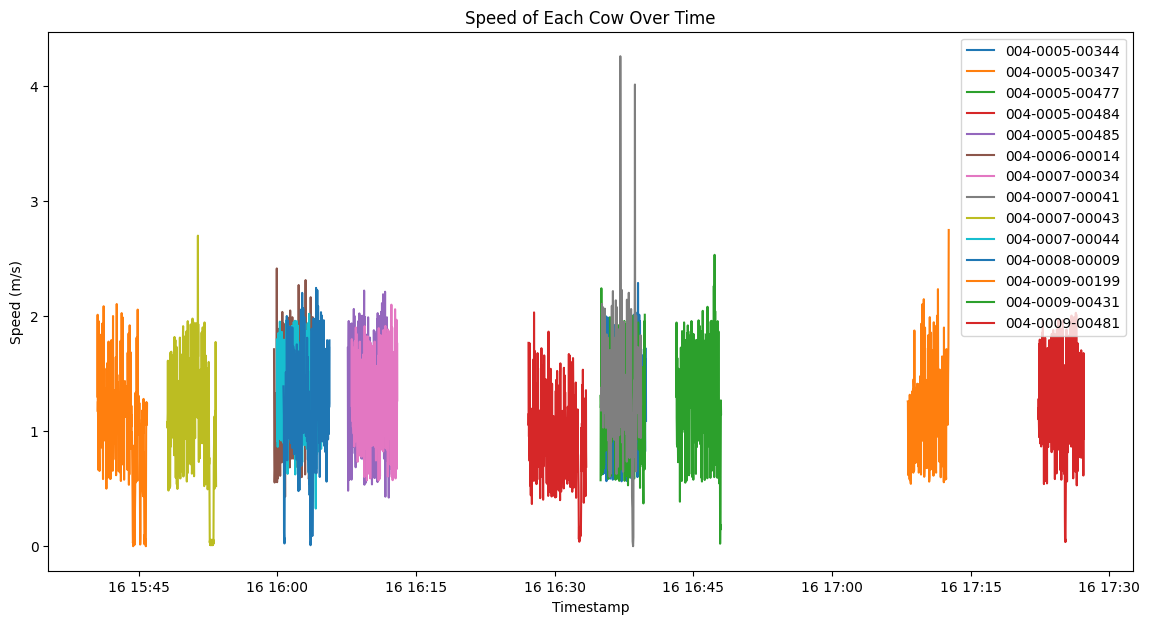

In [13]:
import matplotlib.pyplot as plt

# Plot the speed of each cow over time
fig, ax = plt.subplots(figsize=(14, 7))

for serial_number, group in merged_data.groupby('Serial Number'):
    ax.plot(group['NZDT'], group['GPS Speed'], label=serial_number)

ax.set_title('Speed of Each Cow Over Time')
ax.set_xlabel('Timestamp')
ax.set_ylabel('Speed (m/s)')
ax.legend()

plt.show()

# 4 Hypothesis Testing

###Formulating Hypotheses:
- Null Hypothesis (H0): There is no significant difference between the GPS and IMU headings.
- Alternative Hypothesis (H1): There is a significant difference between the GPS and IMU headings.

Choosing a Test Statistic:

- A paired t-test is used because we are comparing two sets of related measurements (GPS and IMU headings).

Setting the Significance Level:

- A significance level (α) of 0.05 is chosen.

Calculating the Test Statistic and P-value:

- The ttest_rel function from the scipy.stats module is used to perform the paired t-test.

In [24]:
import scipy.stats as stats
# Perform a paired t-test
t_stat, p_value = stats.ttest_rel(merged_data['GPS Heading'], merged_data['Heading'])

# Print the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpret the result
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis (H0). There is a significant difference between the GPS and IMU headings.")
else:
    print("Fail to reject the null hypothesis (H0). There is no significant difference between the GPS and IMU headings.")

T-statistic: -38.15244464158747
P-value: 2.8463280546862764e-264
Reject the null hypothesis (H0). There is a significant difference between the GPS and IMU headings.


### Implications of Results
Significant Difference:

- The results show a significant difference between the GPS and IMU headings, suggesting that these two methods of measuring heading do not perfectly align.

Potential Causes:

- Sensor Errors: There might be inaccuracies or calibration issues in either the GPS or IMU sensors.
- Natural Head Movements: The cow's natural head movements could cause discrepancies between the IMU heading (which tracks head orientation) and GPS heading (which tracks movement direction).
- Environmental Factors: External factors like magnetic interference could affect the sensor readings.

Recommendations:

- Calibration: Regularly calibrate both GPS and IMU sensors to minimize inaccuracies.
- Data Filtering: Implement filtering techniques to smooth out noise and sudden movements.
- Cross-Validation: Use additional methods or sensors to cross-validate the heading data.